## ==========  MULTI CLASSIFICATION: CLEVR DATA SET  ==============

### Using MLP (Multi-Layer Perceptron) Classifier

### Reading Input Dataset: Image Pixels & Class Labels

In [1]:
import csv
import os

In [2]:
import numpy as np 
import copy
import sys
import pdb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

def get_data(x_path, y_path, doNormalize):
    ''' Returns: x: np array of [NUM_OF_SAMPLES x n]  y: np array of [NUM_OF_SAMPLES]
    '''
    x = np.load(x_path)
    y = np.load(y_path)
    

    y = y.astype('float')
    x = x.astype('float')

    #normalize x:
    if doNormalize:
        x = 2*(0.5 - x/255)
    return x, y

x_train, y_train = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/x_train.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/y_train.npy", 1)
x_test,   y_test = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/x_test.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/y_test.txt", 1)
print ("training data det:          ", x_train)
print ("\ntraining class labels:    ", y_train)
print ("\ntesting data det:         ", x_test)
print ("\ntesting class labels:     ", y_test)
print ("\nsize of single sample:      ", len(x_train[0]))
print ("number of training samples: ", len(x_train))
print ("number of testing  samples: ", x_test.shape)

training data det:           [[ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.21568627  0.21568627  0.22352941 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.21568627  0.21568627  0.22352941 ... -0.2        -0.15294118
  -1.        ]
 ...
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1.        ]
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1.        ]
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]]

training class labels:     [1. 3. 4. ... 4. 3. 2.]

testing data det:          [[ 0.20784314  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.21568627  0.21568627  0.22352941 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.20784314  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]
 ...
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1.        ]
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1

### Example Image

number of boxes in the image:  3.0


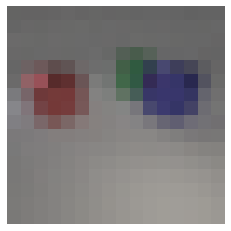

In [3]:
x_train_rgb, y_train = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/x_train.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/y_train.npy", 0)
x_test_rgb,  y_test = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/x_test.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/clevr/y_test.txt", 0)

from matplotlib import pyplot as plt
index = 4
img = np.reshape(np.uint64(x_train_rgb[index]), (16, 16, 4))
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.show
print ("number of boxes in the image: ", y_train[index])

### Distribution of Class Labels

In [4]:
unique_labels  = np.unique(y_train)
label_count    = np.bincount(np.int64(y_train))

print ("[train] unique labels:      ", unique_labels)
print ("[train] count distribution: ", label_count)

unique_labels  = np.unique(y_test)
label_count    = np.bincount(np.int64(y_test))

print ("[test]  unique labels:      ", unique_labels)
print ("[test]  count distribution: ", label_count)

[train] unique labels:       [1. 2. 3. 4. 5.]
[train] count distribution:  [   0 1971 1978 1952 2008 2091]
[test]  unique labels:       [1. 2. 3. 4. 5.]
[test]  count distribution:  [  0 214 183 219 191 193]


### MLP Classifier Train  [Way 1]

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

# number of iter = 300 (epochs), relu, adam, learning rate = 0.001, batch size = 'auto', last activation: softmax, 
# hidden layer = [100], alpha = 0.0001
# setting random state ensures reproducibility

/Users/dishantgoyal/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("specifications of the default MLP: \n\n", vars(clf))  

### Accuracy on Training Dataset  [Way 1]

In [6]:
print ("full accuracy of test  data set: ", clf.score(x_test[:1000], y_test))     
print ("full accuracy of train data set: ", clf.score(x_train, y_train))

full accuracy of test  data set:  0.817
full accuracy of train data set:  0.9061


number of boxes in the image (actual)    : 1.0
number of boxes in the image (predicted) : 1.0
predict probability for all classes      : [9.66348066e-01 3.36499031e-02 2.03091618e-06 3.20124928e-12
 1.15206147e-20]


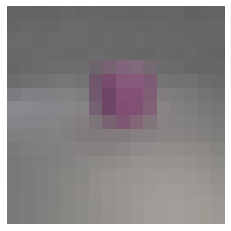

In [47]:
from matplotlib import pyplot as plt
index = 0
img = np.reshape(np.uint64(x_test_rgb[index]), (16, 16, 4))
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.show
print ("number of boxes in the image (actual)    :",  y_test[index])
print ("number of boxes in the image (predicted) :",  clf.predict(x_test[index:index+1, :])[0])         # returns a 2d matrix
print ("predict probability for all classes      :",  clf.predict_proba(x_test[index:index+1])[0])      # returns a 2d matrix

### MLP Classifier Train  [Way 2]

### Neural Network Design Parameters

In [51]:
batch_size              = 32
learning_rate           = 'invscaling' # gradually decreases the learning rate at each time step ‘t’ (an iteration of sgd) 
                                       # using an inverse scaling exponent of ‘power_t’. 
                                       # effective_learning_rate = learning_rate_init / pow(t, power_t), where power_t = 0.5
                                       # we implemented the same just that we had change in an epoch instead of in sgd iteration
activation_fn           = 'relu'
gradient_descent_solver = 'sgd'
alpha                   = 0                            # it is related to L2-regularization
hidden_layer_list       = [512, 256, 128, 64, 32]
initial_num_features    = len(x_train[0])
train_size              = len(x_train)
test_size               = len(x_test)

print ("batch size              :", batch_size)
print ("learning rate           :", learning_rate)
print ("activation function     :", activation_fn)
print ("gradient_descent_solver :", gradient_descent_solver)
print ("alpha                   :", alpha)
print ("num features            :", initial_num_features)
print ("size of training        :", train_size)
print ("size of test            :", test_size)

batch size              : 32
learning rate           : invscaling
activation function     : relu
gradient_descent_solver : sgd
alpha                   : 0
num features            : 1024
size of training        : 10000
size of test            : 10000


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf2 = MLPClassifier(hidden_layer_sizes=hidden_layer_list, batch_size=batch_size,
                    alpha=alpha, learning_rate=learning_rate, solver=gradient_descent_solver
                    ).fit(x_train, y_train)

# max_iter = 200 (number of epochs)

/Users/dishantgoyal/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("specifications of the MLP 2: \n\n", vars(clf2))       

### Accuracy on Training Dataset  [Way 2]

In [10]:
print ("full accuracy of test  data set: ", clf2.score(x_test[:1000], y_test))
print ("full accuracy of train data set: ", clf2.score(x_train, y_train))

full accuracy of test  data set:  0.62
full accuracy of train data set:  0.6264


number of boxes in the image (actual)    : 3.0
number of boxes in the image (predicted) : 2.0
predict probability for all classes      : [0.05635976 0.46155548 0.36666588 0.10003543 0.01538344]


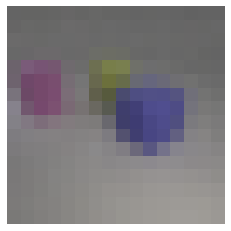

In [49]:
from matplotlib import pyplot as plt
index = 10
img = np.reshape(np.uint64(x_test_rgb[index]), (16, 16, 4))
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.show
print ("number of boxes in the image (actual)    :",  y_test[index])
print ("number of boxes in the image (predicted) :",  clf2.predict(x_test[index:index+1, :])[0])
print ("predict probability for all classes      :",  clf2.predict_proba(x_test[index:index+1])[0])